In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
vehicles = (0, 1, 8, 9)
animals = (2, 3, 4, 5, 6, 7)

In [5]:
y_train_binary = []
for i in y_train.flatten():
    if i in vehicles:
        y_train_binary.append(0)
    elif i in animals:
        y_train_binary.append(1)

y_test_binary = []
for i in y_test.flatten():
    if i in vehicles:
        y_test_binary.append(0)
    elif i in animals:
        y_test_binary.append(1)


In [23]:
import numpy as np
y_train = to_categorical(y_train_binary)
y_test = to_categorical(y_test_binary)

In [24]:
x_train_normal = x_train/255.0
x_test_normal = x_test/255.0


In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])
   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train_normal, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.9413 - loss: 0.1538
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9480 - loss: 0.1319
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9544 - loss: 0.1167
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9607 - loss: 0.1015
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9666 - loss: 0.0887
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9707 - loss: 0.0775
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9756 - loss: 0.0650
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9763 - loss: 0.0632
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9802 - loss: 0.0530
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9833 - loss: 0.0461


In [29]:
x_test_predict = model.predict(x_test)
print(x_test_predict)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [30]:
from sklearn import metrics
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6962 - loss: 216.8242


[212.88827514648438, 0.7050999999046326]

In [32]:
predicted_class = np.argmax(x_test_predict, axis = 1)
actual_class = np.argmax(y_test, axis = 1)

<Figure size 500x500 with 0 Axes>

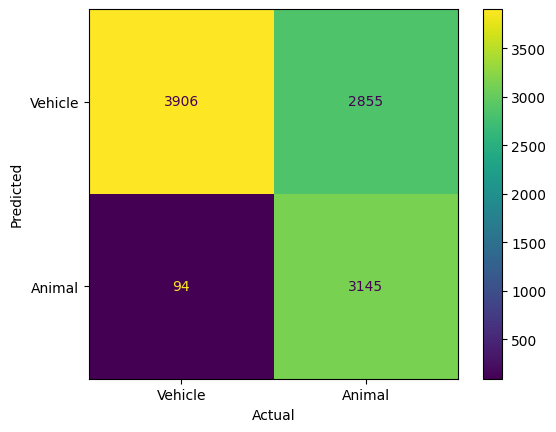

In [57]:
cm = metrics.confusion_matrix(predicted_class, actual_class)
import matplotlib.pyplot as plt
plt.figure(figsize = [5, 5])
metrics.ConfusionMatrixDisplay(cm, display_labels=["Vehicle", "Animal"]).plot()
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

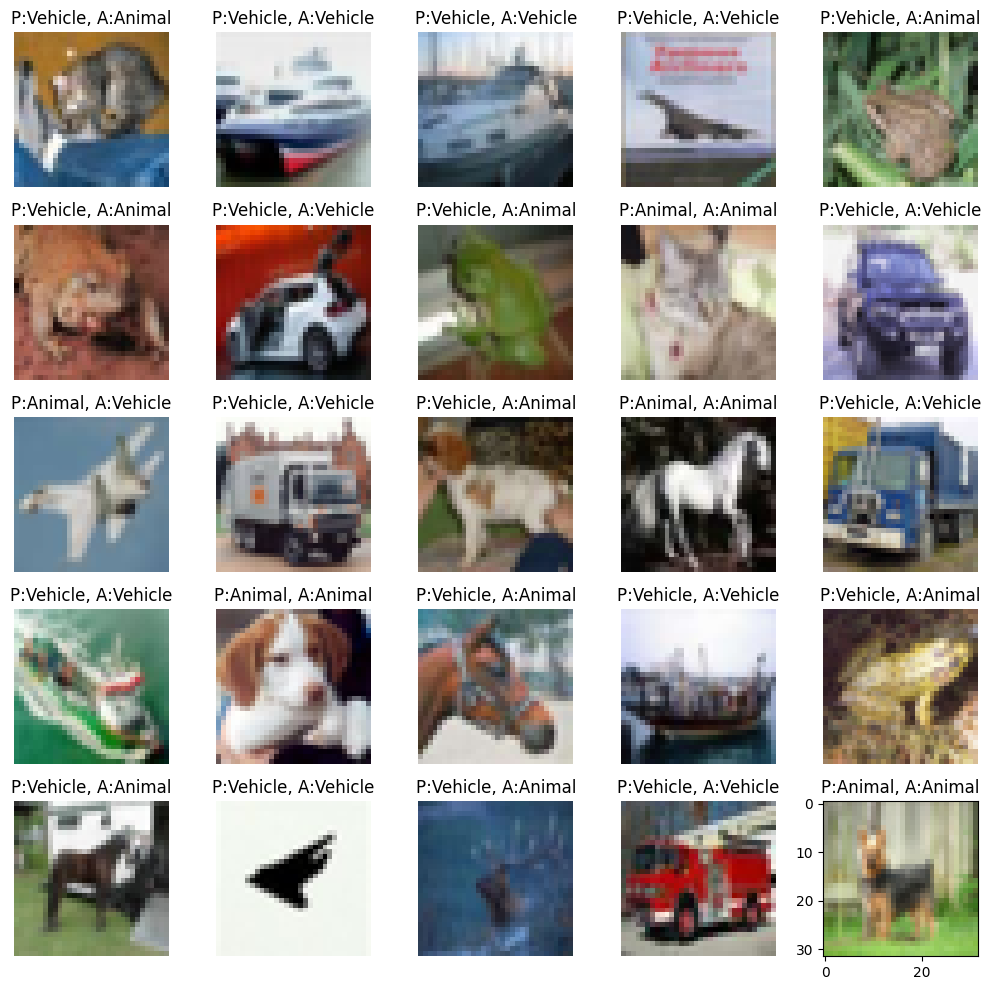

In [50]:
def subplots(index):
    plt.figure(figsize=(10, 10))
    for i in range(index):
        plt.axis("off")
        plt.subplot(5, 5, i+1)
        plt.imshow(x_test[i])
        if predicted_class[i]==0:
            p_label="Vehicle"
        else:
            p_label="Animal"
        if actual_class[i]==0:
            a_label="Vehicle"
        else:
            a_label="Animal"
        plt.title(f"P:{p_label}, A:{a_label}")
    plt.tight_layout()

subplots(25)